Importing all the libraries

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

Data Collection

In [83]:
data = pd.read_csv('/content/GlobalWeatherRepository.csv')

In [84]:
#To print all the columns
pd.set_option('display.max_columns', None)

In [85]:
#Printing first 5 rows in a column
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [86]:
#Statistics of the data
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,48916.000000,48916.000000,4.891600e+04,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000,48916.000000
mean,19.141369,22.205428,1.726748e+09,23.023070,73.442976,8.283578,13.335173,170.936524,1013.750204,29.935434,0.145714,0.005547,63.260917,40.079074,24.095439,75.365439,9.622449,5.700364,4.257092,11.977441,19.277972,517.097059,62.775127,14.067219,10.639040,23.574427,46.345583,1.652077,2.516416,49.738286
std,24.481256,65.789256,6.336746e+06,9.176298,16.517213,9.868282,15.880226,103.185017,7.059689,0.208370,0.632721,0.024992,24.687039,33.748132,10.905119,19.627319,2.504946,1.556232,3.443044,10.919882,17.574357,992.763054,37.782233,25.795784,51.903607,45.732979,140.711947,0.961911,2.475342,34.868867
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,0.000000,0.000000,2.000000,0.000000,-35.600000,-32.100000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721220e+09,18.200000,64.800000,4.000000,6.500000,82.000000,1010.000000,29.830000,0.000000,0.000000,45.000000,4.000000,18.200000,64.800000,10.000000,6.000000,1.000000,6.700000,10.800000,220.125500,37.000000,0.887500,0.700000,4.700000,7.700000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.726829e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,0.000000,0.000000,68.000000,31.000000,26.500000,79.600000,10.000000,6.000000,4.400000,10.600000,17.000000,310.800000,59.000000,2.960000,2.100000,12.025000,18.685000,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.732265e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,0.030000,0.000000,84.000000,75.000000,31.400000,88.400000,10.000000,6.000000,7.000000,15.925000,25.700000,477.300000,83.700000,14.245000,7.955000,26.400000,42.200000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.737628e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,42.240000,1.660000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,16.100000,1845.700000,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [87]:
#Identifying the missing values
data.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [88]:
# Identify numerical columns (excluding non-numerical ones)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Standardize all numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [89]:
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,0.628186,0.714023,Asia/Kabul,-1.720016,2024-05-16 13:15,0.389805,0.384877,Partly Cloudy,0.001664,-0.002215,1.619084,NNW,-0.247918,-0.218048,-0.230300,-0.221952,-1.590362,-0.298659,0.110459,0.108756,0.150724,0.192541,0.796660,-0.226877,-0.226353,-0.241850,1.064661,-0.502693,-0.201126,-0.331808,-0.140328,-0.677905,-0.612615,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,0.150902
1,Albania,Tirana,0.906361,-0.036259,Europe/Tirane,-1.720016,2024-05-16 10:45,-0.438424,-0.438515,Partly cloudy,-0.140206,-0.134456,1.444638,NW,-0.247918,-0.266040,-0.072251,-0.221952,1.245163,1.034762,-0.467257,-0.466978,0.150724,0.192541,0.215773,-0.052880,-0.049958,-0.325859,0.913795,-0.510446,-0.203052,-0.491432,-0.315155,-0.677905,-0.612615,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,0.150902
2,Algeria,Algiers,0.719686,-0.291166,Africa/Algiers,-1.720016,2024-05-16 09:45,-0.002514,-0.002602,Sunny,0.113134,0.111135,1.056981,W,-0.389569,-0.410016,-0.230300,-0.221952,-1.387824,-1.187606,0.046269,0.052711,0.150724,0.192541,0.215773,0.176062,0.171958,0.023775,-1.338609,1.978358,0.053195,-0.288076,-0.198603,-0.677905,-0.612615,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,0.150902
3,Andorra,Andorra La Vella,0.954153,-0.314423,Europe/Andorra,-1.720016,2024-05-16 10:45,-1.822439,-1.824962,Light drizzle,-0.089538,-0.090376,0.427038,SW,-0.956172,-0.889938,0.243847,0.178173,-0.091584,1.775551,-1.861112,-1.857911,-3.042991,-3.020379,-0.655558,-0.318454,-0.317396,-0.349429,0.043007,-0.483309,-0.201126,-0.500179,-0.322972,-0.677905,-0.612615,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,0.150902
4,Angola,Luanda,-1.142983,-0.136428,Africa/Luanda,-1.720016,2024-05-16 09:45,0.324418,0.324333,Partly cloudy,-0.018603,-0.021106,-0.202905,SSE,-0.389569,-0.410016,-0.230300,-0.221952,1.042626,0.293973,0.422243,0.419550,0.150724,0.192541,1.087104,0.047854,0.052465,2.464765,-1.158629,2.272983,0.401921,3.494791,1.534743,3.480528,3.023283,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,0.150902


In [90]:

from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = data.select_dtypes(include=['float64', 'int64']).apply(zscore)

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Identify rows without outliers
data_cleaned = data[(z_scores.abs() < threshold).all(axis=1)]


In [91]:
data_cleaned.shape

(41512, 41)

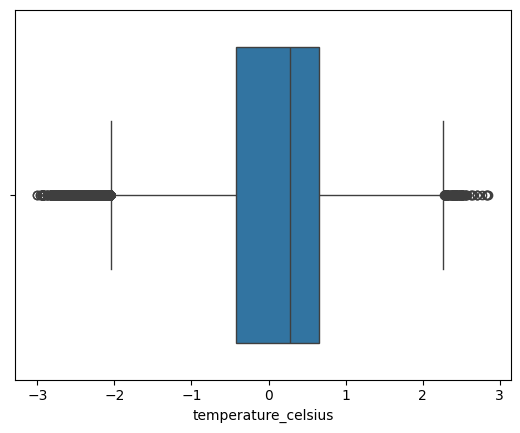

In [92]:

sns.boxplot(x=data_cleaned['temperature_celsius'])
plt.show()


In [93]:
new_data = data_cleaned

Exploratory Data Analysis

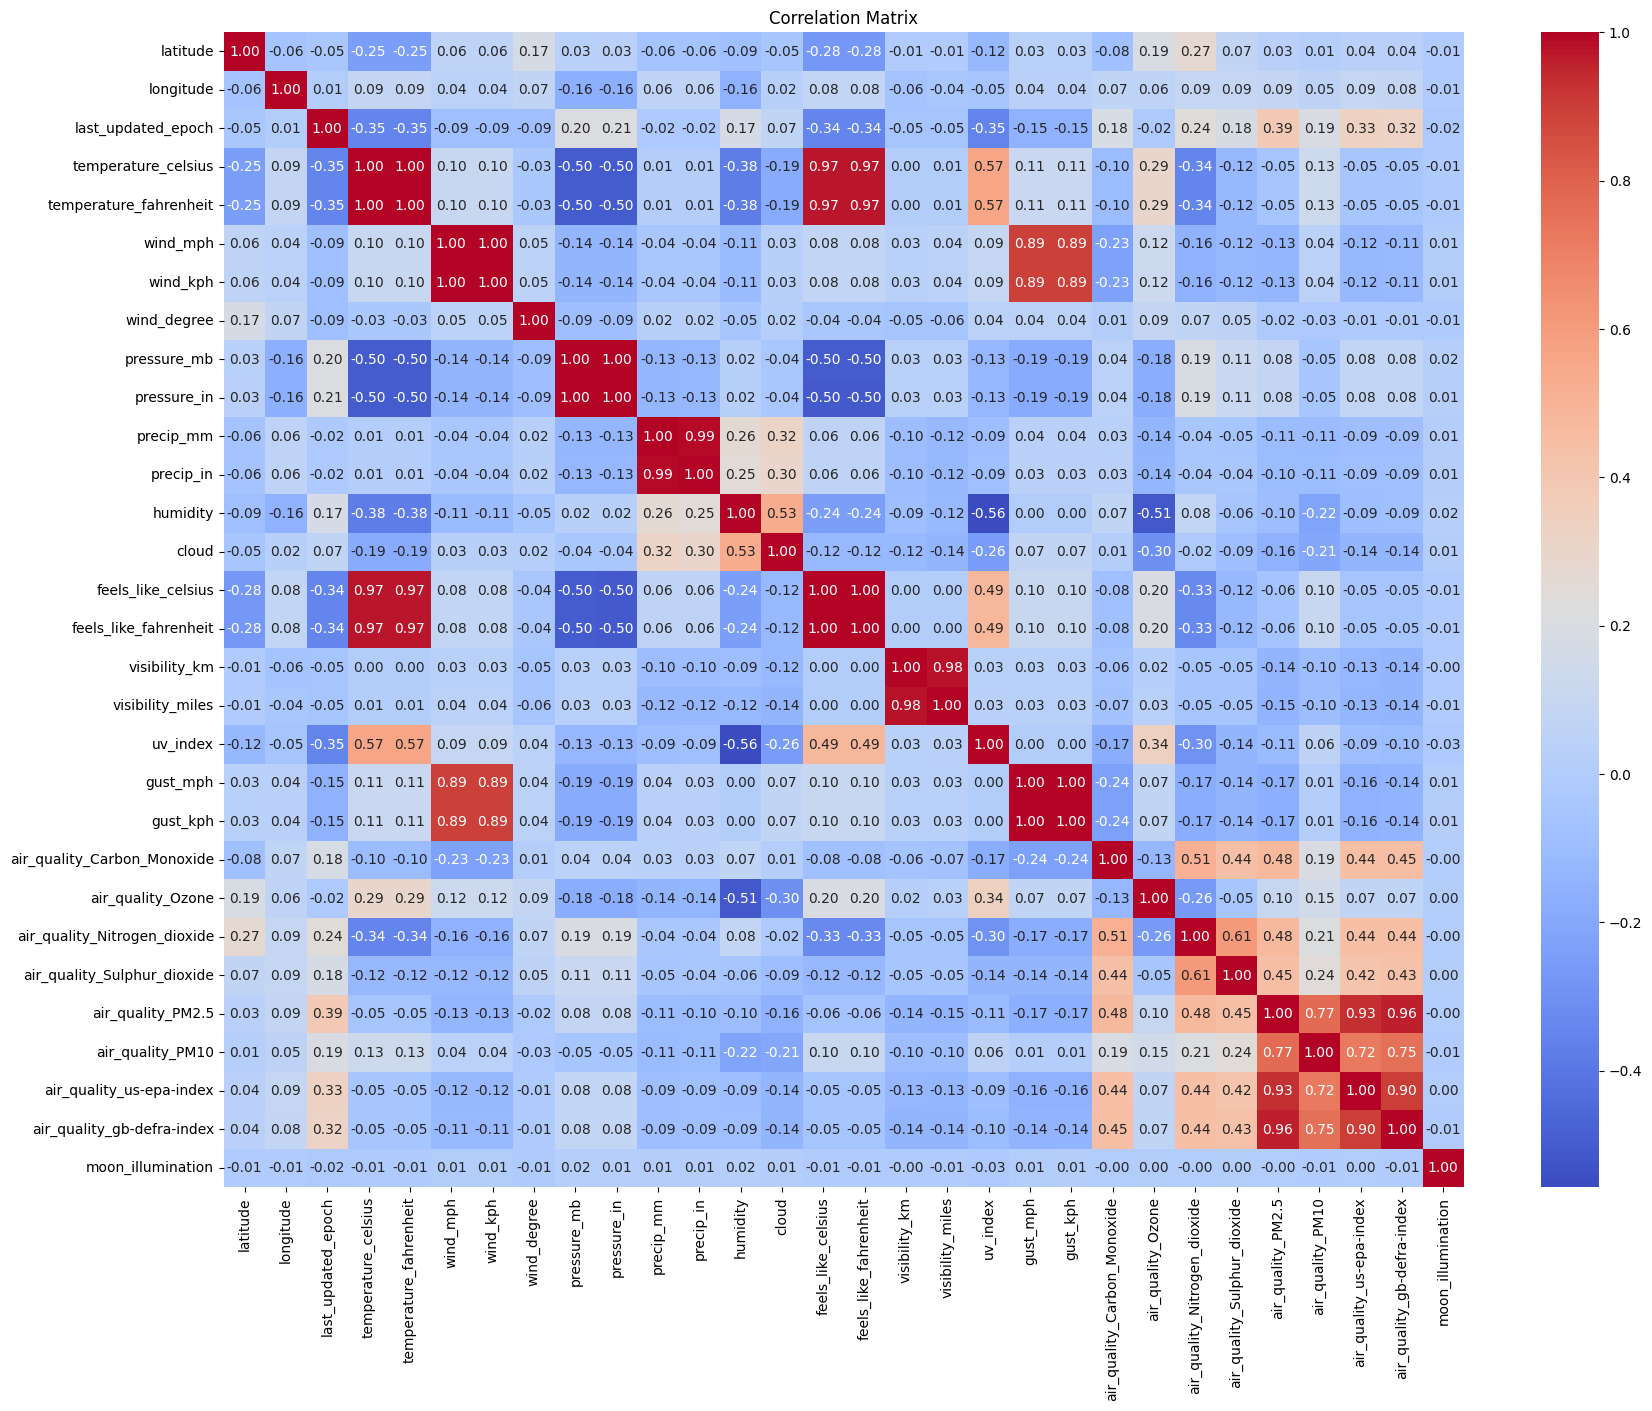

In [94]:
# Selecting only numerical columns from the cleaned data
numeric_data = new_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix only for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


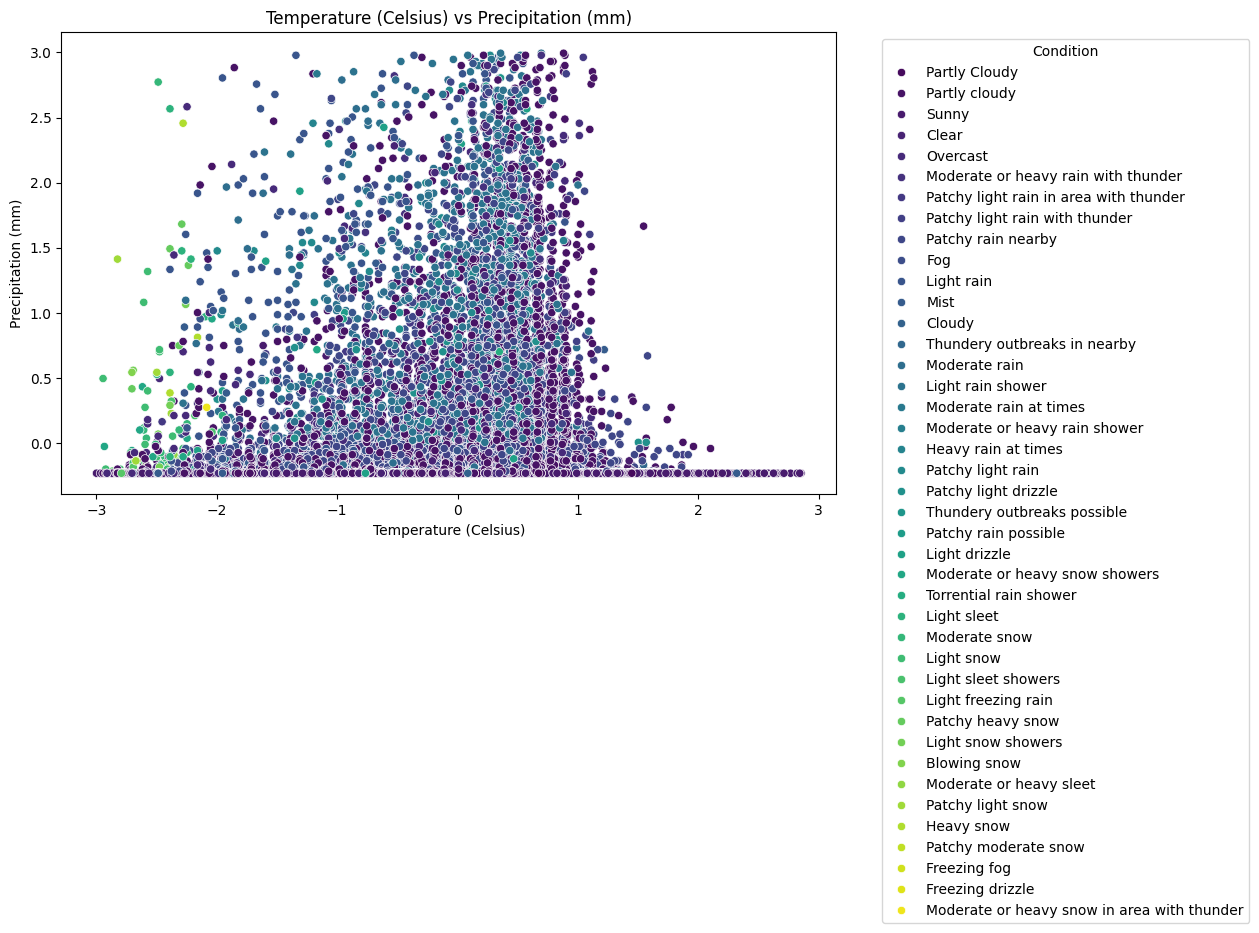

In [95]:
# Plotting temperature_Celsius vs Precip_mm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='temperature_celsius', y='precip_mm', hue='condition_text', palette='viridis')
plt.title('Temperature (Celsius) vs Precipitation (mm)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Creating Visualizations for Temperature and Precipitation

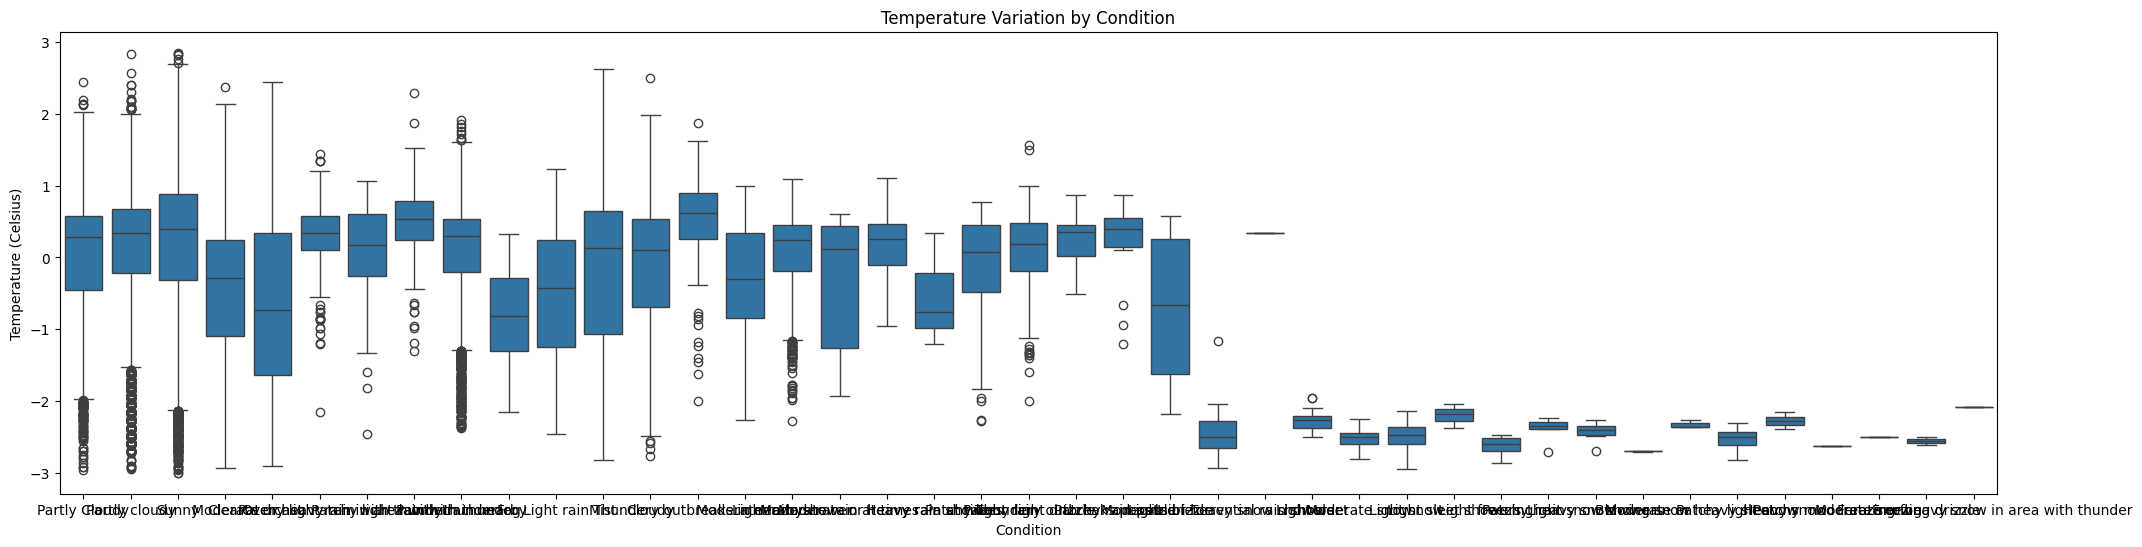

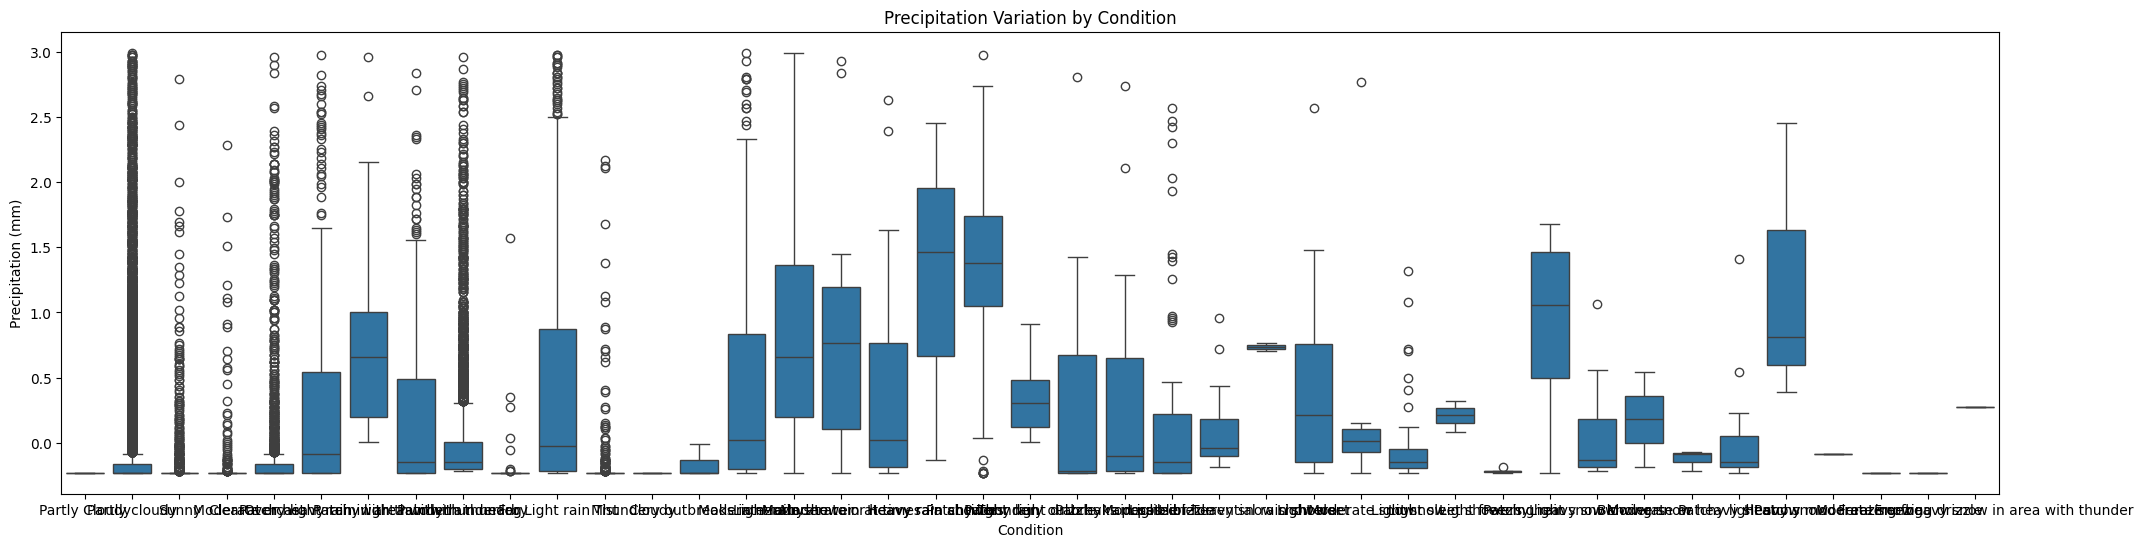

In [96]:
# Boxplot for Temperature by Condition (to visualize how temperature varies by weather conditions)
plt.figure(figsize=(25, 6))
sns.boxplot(data=new_data, x='condition_text', y='temperature_celsius')
plt.title('Temperature Variation by Condition')
plt.xlabel('Condition')
plt.ylabel('Temperature (Celsius)')
plt.show()

# Boxplot for Precipitation by Condition
plt.figure(figsize=(25, 6))
sns.boxplot(data=new_data, x='condition_text', y='precip_mm')
plt.title('Precipitation Variation by Condition')
plt.xlabel('Condition')
plt.ylabel('Precipitation (mm)')
plt.show()

In [104]:
# 2. Convert 'lastupdated' to datetime format and set it as the index
new_data['last_updated'] = pd.to_datetime(new_data['last_updated'])
new_data.set_index('last_updated', inplace=True)


<ipython-input-104-97daa2737ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['last_updated'] = pd.to_datetime(new_data['last_updated'])


Removing categorical values from data

In [122]:
# Step 1: Identify categorical columns
categorical_columns = new_data.select_dtypes(include=['object']).columns

# Step 2: Drop the categorical columns from the DataFrame
data1 = new_data.drop(columns=categorical_columns)

data1.head()


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-05-16 13:15:00,0.628186,0.714023,-1.720016,0.389805,0.384877,0.001664,-0.002215,1.619084,-0.247918,-0.218048,-0.230300,-0.221952,-1.590362,-0.298659,0.110459,0.108756,0.150724,0.192541,0.796660,-0.226877,-0.226353,-0.241850,1.064661,-0.502693,-0.201126,-0.331808,-0.140328,-0.677905,-0.612615,0.150902
2024-05-16 10:45:00,0.906361,-0.036259,-1.720016,-0.438424,-0.438515,-0.140206,-0.134456,1.444638,-0.247918,-0.266040,-0.072251,-0.221952,1.245163,1.034762,-0.467257,-0.466978,0.150724,0.192541,0.215773,-0.052880,-0.049958,-0.325859,0.913795,-0.510446,-0.203052,-0.491432,-0.315155,-0.677905,-0.612615,0.150902
2024-05-16 09:45:00,0.719686,-0.291166,-1.720016,-0.002514,-0.002602,0.113134,0.111135,1.056981,-0.389569,-0.410016,-0.230300,-0.221952,-1.387824,-1.187606,0.046269,0.052711,0.150724,0.192541,0.215773,0.176062,0.171958,0.023775,-1.338609,1.978358,0.053195,-0.288076,-0.198603,-0.677905,-0.612615,0.150902
2024-05-16 04:45:00,-0.082569,-1.277660,-1.720016,0.324418,0.324333,-0.271943,-0.272995,-0.784391,-0.106267,-0.122063,-0.198690,-0.221952,0.840088,-0.446817,0.376392,0.378790,0.150724,0.192541,-0.946002,0.340901,0.342663,-0.298964,-0.893951,-0.537582,-0.201126,-0.489246,-0.297388,-0.677905,-0.612615,0.150902
2024-05-16 05:45:00,-2.194819,-1.229323,-1.720016,-1.637177,-1.637277,-0.616484,-0.613044,-1.559705,0.035384,0.021913,-0.230300,-0.221952,1.204656,-1.187606,-1.558499,-1.552211,0.150724,0.192541,-0.946002,-0.501608,-0.499481,-0.248498,-1.457714,-0.223574,-0.179932,-0.428020,-0.291702,-0.677905,-0.612615,0.150902


In [123]:
data1.shape

(41512, 30)

In [124]:
X = data1.drop(columns='temperature_celsius', axis=1)
Y = data1['temperature_celsius']

In [125]:
print(Y)

last_updated
2024-05-16 13:15:00    0.389805
2024-05-16 10:45:00   -0.438424
2024-05-16 09:45:00   -0.002514
2024-05-16 04:45:00    0.324418
2024-05-16 05:45:00   -1.637177
                         ...   
2025-01-23 07:30:00   -0.111492
2025-01-23 06:30:00   -0.100594
2025-01-23 13:30:00   -0.296753
2025-01-23 12:30:00    0.117361
2025-01-23 12:30:00   -0.307651
Name: temperature_celsius, Length: 41512, dtype: float64


Splitting the data into training data and testing data

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [127]:
X_train.shape, X_test.shape

((33209, 29), (8303, 29))

In [130]:
# Model Building (Linear Regression)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)

In [138]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [135]:
MAE = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error: {MAE}")

Mean Absolute Error: 0.0020820727125848834


In [137]:
MSE = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error (MSE): {MSE}')

Mean Squared Error (MSE): 6.903482113910588e-06


In [139]:
r2 = r2_score(Y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.9999919145135316


Making Visualization of Model metrics


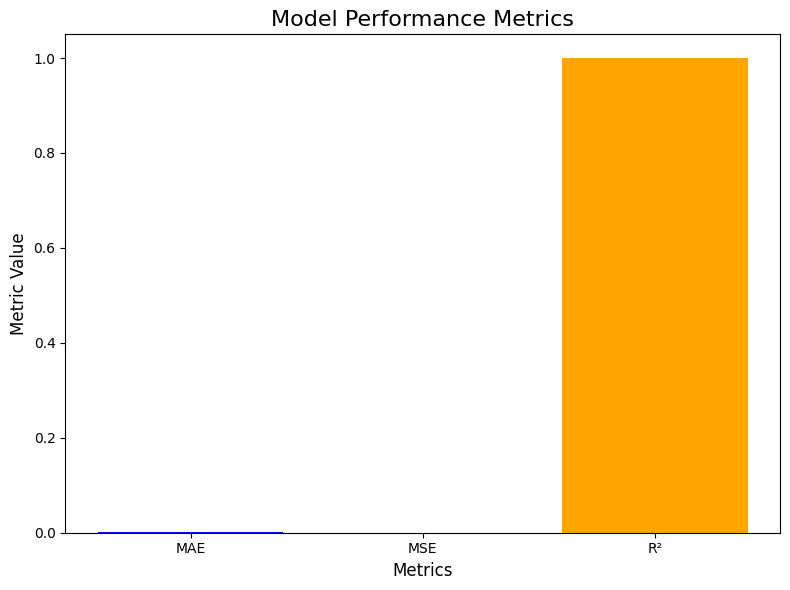

In [141]:
# Creating the metrics list for visualization
metrics = ['MAE', 'MSE', 'R²']
values = [MAE, MSE, r2]

# Creating a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Adding labels and title
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Metric Value', fontsize=12)
plt.xlabel('Metrics', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()